In [15]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.ticker
from pylab import * 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import mplhep as hep
import requests
import math
import re
import csv

## 2HDM (type IV) limits from the low mass dark photon search

### Evaluation of sinTheta limits starting from the upper limit on the cross section * BR * acceptance

`Acceptance` evaluated generating gg $\to$ A events with Pythia (model: gg2A3 inclusive)

`Cross section` computed using HiGLU+HDECAY generators
`Branching ratios` (A $\to \mu\mu$) retrieved from here: ([link](https://github.com/cecilecaillol/CMS_HAA_SummaryPlots/blob/master/BR/BR_IV_0.5.dat))

In [16]:
# MODEL INDEPENDENT LIMITS on the cross section in pb for different mass points (GeV): 1,2,4,5,6,7,8. 
# Validation: mS = 20 GeV

#obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963 ]
obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963, 0.15 ]

v_obs_limit = []
v_exp_limit = []
v_mass = []
# Reference results: noPtMuMu cut
#f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_expectedLimit_noPtMuMuCut_20220401.txt", delimiter = "\t")

# Updated Trigger Efficiency: observed and expected results WITH PtMuMu cut
f_obs_limit = np.loadtxt("./limit_darkphoton_obs_CL90.txt")
f_exp_limit = np.loadtxt("./limit_darkphoton_run3_exp.txt")

# Updated Trigger Efficiency: observed and expected results WITHOUT PtMuMu cut
#f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_obsLimit_newTreff_noPtCut_20220712.txt", delimiter = "\t")
#f_exp_limit = np.loadtxt("./CMS_modelIndependentLimits_expLimit_newTreff_noPtCut_20220712.txt", delimiter = "\t")

#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_obs_limit)):
    v_mass.append(f_obs_limit[i][0])
    v_obs_limit.append(round(f_obs_limit[i][1]/2, 9))
    v_exp_limit.append(round(f_exp_limit[i][1], 9))
print("Model independent observed limits: \n", v_obs_limit)
print("##################################################")
print("Model independent expected limits: \n", v_exp_limit)

Model independent observed limits: 
 [0.001374165, 0.000628732, 0.000536295, 0.000809987, 0.000766615, 0.000567424, 0.000437693, 0.000318013, 0.000350554, 0.000297705, 0.000120099, 0.000105888, 9.3801e-05, 8.303e-05, 0.000100599, 9.7973e-05, 6.0105e-05, 0.000130075, 0.000195348, 0.000185173, 0.000119534, 8.752e-05, 6.994e-05, 5.5572e-05, 2.291e-05, 2.1846e-05, 2.6718e-05, 2.4615e-05, 3.5348e-05, 5.4037e-05, 9.9945e-05, 4.8804e-05, 2.6602e-05, 1.6074e-05, 1.4072e-05, 1.3351e-05, 1.1136e-05, 1.1975e-05, 3.321e-05, 3.703e-05, 2.3299e-05, 1.292e-05, 9.66e-06, 1.1723e-05, 1.6002e-05, 1.8168e-05, 2.7393e-05, 2.528e-05, 1.0833e-05, 5.554e-06, 8.644e-06, 1.2738e-05, 7.5e-06, 6.146e-06, 1.3963e-05, 1.1171e-05, 6.568e-06, 4.094e-06, 2.722e-06, 3.808e-06, 6.6e-06, 8.511e-06, 9.204e-06, 4.467e-06, 3.515e-06, 3.253e-06, 4.105e-06, 4.927e-06, 6.084e-06, 3.297e-06, 2.932e-06, 3.452e-06, 4.406e-06, 5.093e-06, 3.968e-06, 2.176e-06, 2.266e-06, 4.919e-06, 6.303e-06, 5.871e-06, 4999.5, 4999.5, 1.115e-06, 

In [17]:
print("mass: ", len(v_mass))
print("obs lim: ", len(v_obs_limit))
print("exp lim: ", len(v_exp_limit))

mass:  146
obs lim:  146
exp lim:  146


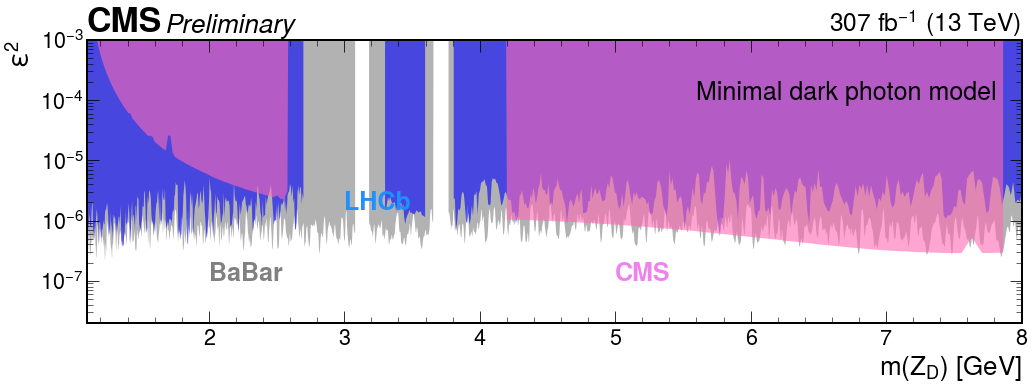

In [18]:
f_LHCb = np.loadtxt("./limit_darkphoton_lhcb_90CL.txt")
v_lim_LHCb = []
v_mass_LHCb = []
for i in range(len(f_LHCb)):
    v_mass_LHCb.append(f_LHCb[i][0]/1000) #Conversion from Mev to GeV
    v_lim_LHCb.append(f_LHCb[i][1]/2.45)
    
f_BaBar = np.loadtxt("./limit_darkphoton_babar.txt")
v_lim_BaBar = []
v_mass_BaBar = []
for i in range(len(f_BaBar)):
    v_mass_BaBar.append(f_BaBar[i][0])
    v_lim_BaBar.append(f_BaBar[i][1]*f_BaBar[i][1])
#print("Model independent expected limits: \n", v_lim_BaBar)
    
p_cms_obs, p_lhcb = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 19})
#range = np.array([2.696,3.303])

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, lumi=307)

p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, '-', color="grey", linewidth=0)
p_babar = plt.fill_between(v_mass_BaBar, v_lim_BaBar, 1, color="grey", linewidth=0, alpha=0.6)

p_lhcb = plt.plot(v_mass_LHCb, v_lim_LHCb, '-', color="blue", linewidth=0)
p_lhcb = plt.fill_between(v_mass_LHCb, v_lim_LHCb, 1, color="blue", linewidth=0, alpha=0.6)
p_lhcb = plt.semilogy()
p_cms_obs = plt.plot(v_mass, v_exp_limit, '-', color="hotpink", linewidth=0)
p_lhcb = plt.fill_between(v_mass, v_exp_limit, 1, color="hotpink", linewidth=0, alpha=0.6)

plt.xlim(1.1,8)
plt.ylim(2e-8, 1e-3)
#p_lhcb.set_yticks([1e-1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7,1e-8])
#p_cms_obs.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('m($Z_{D}$) [GeV]')
plt.ylabel('$\\epsilon^2$')
#plt.title("Upper limits on the mixing angle for the 2HDM scenario")
#plt.legend(loc="upper left")
p_babar = plt.text(2.0, 1e-7, "BaBar", fontsize=25, color="grey", fontweight='bold')
p_cms_obs = plt.text(5.0, 1e-7, "CMS", fontsize=25, color="violet", fontweight='bold')
p_lhcb = plt.text(3, 1.5e-6, "LHCb", fontsize=25, color="dodgerblue", fontweight='bold')

plt.text(5.6, 1e-4, "Minimal dark photon model", fontsize=25, color="black")
#plt.text(5.6, 0.009, "2HDM+S (type IV), tan$\\beta$=0.5", fontsize=16, verticalalignment='top')
#plt.show()
plt.tight_layout()
plt.savefig('run3_darkphoton_EXP.pdf', dpi=1200)
plt.savefig('run3_darkphoton_EXP.png', dpi=1200)